This is to test psi4 vs the strain

In [52]:
import pickle 
import json
import matplotlib.pyplot as plt
import numpy as np
import qnmfits 

In [53]:
filepath  = '/data/rvnd2-2/CCE_data'

In [54]:
filenum = '0001'
rssname = 'R2'
lev = "Lev5"

In [55]:
with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_h.pickle', 'rb') as f:
    h_dict = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_news.pickle', 'rb') as f:
    news_dict = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_psi4.pickle', 'rb') as f:
    psi_4_dict = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_h_pre.pickle', 'rb') as f:
    h_dict_pre = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_news_pre.pickle', 'rb') as f:
    news_dict_pre = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_psi4_pre.pickle', 'rb') as f:
    psi_4_dict_pre = pickle.load(f)

with open(f'{filepath}/superrest_data_test/SXS:BBH_ExtCCE_superrest:{filenum}/SXS:BBH_ExtCCE_superrest:{filenum}_{lev}_{rssname}_metadata.json', 'r') as f:
    metadata = json.load(f)

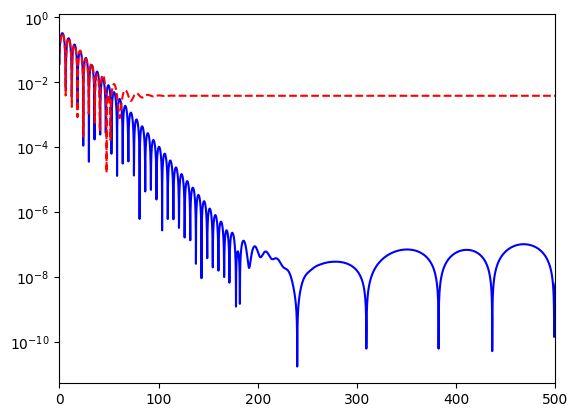

In [56]:
#plt.plot(news_dict['times'], np.abs(np.real(news_dict[(2,2)])), color='black')
#plt.plot(news_dict_pre['times'], np.abs(np.real(news_dict_pre[(2,2)])), linestyle='--', color='black')
#plt.plot(psi_4_dict['times'], np.abs(np.real(psi_4_dict[(2,2)])), color='red')
#plt.plot(psi_4_dict_pre['times'], np.abs(np.real(psi_4_dict_pre[(2,2)])), linestyle='--', color='red')
plt.plot(h_dict['times'], np.abs(np.real(h_dict[(2,2)])), color='blue')
plt.plot(h_dict_pre['times'], np.abs(np.real(h_dict_pre[(2,2)])), linestyle='--', color='red')
plt.xlim(0, 500)

plt.yscale('log')

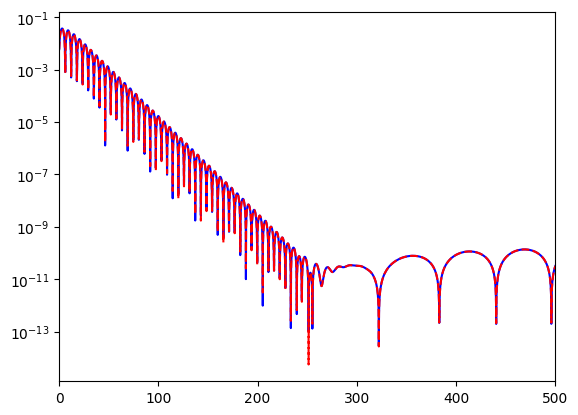

In [57]:
#plt.plot(news_dict['times'], np.abs(np.real(news_dict[(2,2)])), color='black')
#plt.plot(news_dict_pre['times'], np.abs(np.real(news_dict_pre[(2,2)])), linestyle='--', color='black')
plt.plot(psi_4_dict['times'], np.abs(np.real(psi_4_dict[(2,2)])), color='blue')
plt.plot(psi_4_dict_pre['times'], np.abs(np.real(psi_4_dict_pre[(2,2)])), linestyle='--', color='red')
#plt.plot(h_dict['times'], np.abs(np.real(h_dict[(2,2)])), color='blue')
#plt.plot(h_dict_pre['times'], np.abs(np.real(h_dict_pre[(2,2)])), linestyle='--', color='blue')
plt.xlim(0, 500)

plt.yscale('log')

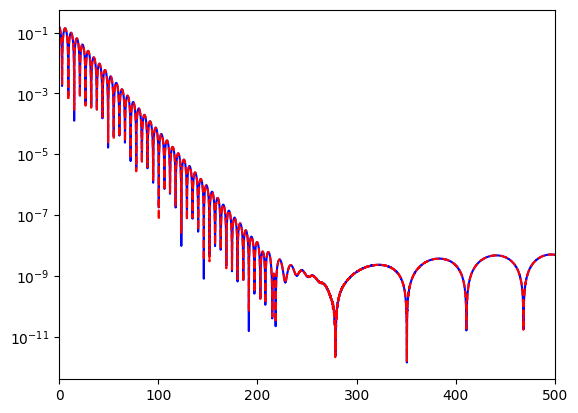

In [58]:
plt.plot(news_dict['times'], np.abs(np.real(news_dict[(2,2)])), color='blue')
plt.plot(news_dict_pre['times'], np.abs(np.real(news_dict_pre[(2,2)])), linestyle='--', color='red')
plt.xlim(0, 500)

plt.yscale('log')

In [59]:
Mf = metadata["M_f"]
chi_f = np.linalg.norm(metadata["chi_f"])

N_MAX = 7
T = 100
t0 = 25

qnm_list = [(2,2,n,1) for n in np.arange(0, N_MAX+1)] + [(3,2,0,1)]
spherical_modes = [(2, 2)]

In [60]:
print(qnm_list)

[(2, 2, 0, 1), (2, 2, 1, 1), (2, 2, 2, 1), (2, 2, 3, 1), (2, 2, 4, 1), (2, 2, 5, 1), (2, 2, 6, 1), (2, 2, 7, 1), (3, 2, 0, 1)]


In [61]:
h_fit = qnmfits.ringdown_fit(h_dict['times'], h_dict[(2,2)], qnm_list, Mf, chi_f, t0, t0_method='geq', T=100)

In [62]:
news_fit = qnmfits.news_ringdown_fit(news_dict['times'], news_dict[(2,2)], qnm_list, Mf, chi_f, t0, t0_method='geq', T=100)

In [63]:
news_fit_pre = qnmfits.news_ringdown_fit(news_dict_pre['times'], news_dict_pre[(2,2)], qnm_list, Mf, chi_f, t0, t0_method='geq', T=100)

In [64]:
psi4_fit = qnmfits.psi_4_ringdown_fit(psi_4_dict_pre['times'], psi_4_dict_pre[(2,2)], qnm_list, Mf, chi_f, t0, t0_method='geq', T=100)

In [65]:
print(h_fit['C'])

[ 0.02997003+0.0582263j   0.00061152-0.00058851j  0.00092397-0.00175789j
  0.00166675+0.0071799j  -0.01596993-0.01404661j  0.03078274+0.01243059j
 -0.02381233-0.00475891j  0.00667382+0.00078074j  0.00016703+0.00010283j]


In [66]:
print(news_fit['C'])

[ 0.02997324+5.82297530e-02j  0.00038693-7.71543057e-04j
  0.00386193+2.55784914e-04j -0.0141933 -2.01165039e-03j
  0.02743265+3.73309422e-03j -0.02734179-2.25601626e-03j
  0.01331733+3.74613890e-04j -0.00259292-8.53749272e-05j
  0.00016654+1.00848236e-04j]


In [67]:
print(news_fit_pre['C'])

[ 0.0298667 +5.82999836e-02j  0.00068047-3.91682835e-04j
 -0.00046342-2.72715633e-03j  0.00766581+5.87890622e-03j
 -0.02368266-6.74015834e-05j  0.02960116-1.23832957e-02j
 -0.01653388+1.25415943e-02j  0.00360902-3.60572695e-03j
  0.00016877+1.00247463e-04j]


In [68]:
print(psi4_fit['C'] * -2)

[ 2.98641337e-02+0.05828995j  7.37057637e-04+0.00020016j
  3.01839058e-05-0.00917855j  1.85194529e-03+0.03391514j
 -1.01146537e-02-0.06134194j  1.77026757e-02+0.0556343j
 -1.18711212e-02-0.02426903j  2.56751805e-03+0.00430222j
  1.68080620e-04+0.00010333j]


(0.0, 250.0)

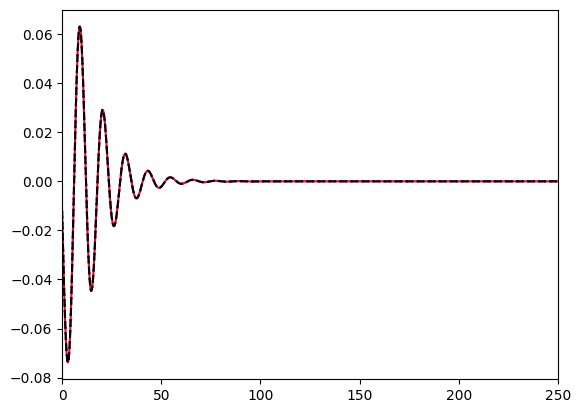

In [102]:
news_1 = np.gradient(h_dict[(2, 2)], h_dict['times'])
psi_4_2 = np.gradient(news_1, h_dict['times'])

psi_4_1 = np.gradient(news_dict[(2,2)], news_dict['times']) 

#plt.plot(h_dict['times'], np.abs(np.real(psi_4_2)), color='red')
#plt.plot(psi_4_dict['times'], np.abs(np.real(psi_4_dict[(2,2)])) * 2, color='black', ls='--')
#plt.plot(news_dict['times'], np.abs(np.real(psi_4_1)), color='blue', ls=':')

plt.plot(h_dict['times'], np.real(psi_4_2), color='red')
plt.plot(news_dict['times'], np.real(psi_4_1), color='blue', ls=':')
plt.plot(psi_4_dict['times'], np.real(psi_4_dict[(2,2)]) * -2, color='black', ls='--')

plt.xlim(0, 250)
#plt.yscale('log')